In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### 1. Load the dataset and Display first 15 rows

In [3]:
df = pd.read_excel("final_dataset_doctorvisit_excel.xlsx")
df.head(15)

,id,first_name,last_name,gender,age,income_pm,active_illness,reduced_illness,visits_pm,locality,...,season,last_visit_dt,nearest_hospital_dist,literate,pat_satisaction,hospital_exp,work_effect,bad_habits,chronic?,hospital_change
0,1,Auria,Richings,Female,18,87428,4,5,3,Florida,...,autumn,2001-08-27,8 km,False,satisfied,1000.0,negative,True,True,1
1,2,Christie,Stirton,Male,57,145531,4,5,4,Ohio,...,winter,2020-11-19,12 km,False,very dissatisfied,1500.0,negative,True,True,3
2,3,Leodora,Pirri,Female,55,11490,5,5,1,Oklahoma,...,spring,2014-11-22,14 km,False,satisfied,3500.0,minimal,True,True,0
3,4,Xena,Senter,Female,23,156548,1,2,2,Minnesota,...,winter,2017-08-28,11 km,False,very satisfied,500.0,significant,True,True,0
4,5,Iago,Beltzner,Male,24,181461,1,3,4,Georgia,...,winter,2003-04-05,11 km,False,very dissatisfied,1750.0,negative,True,True,0
5,6,Bartlett,Tissier,Male,33,95303,2,3,1,Indiana,...,winter,2006-11-16,15 km,False,dissatisfied,1800.0,neutral,True,False,2
6,7,Marci,Germain,Female,11,23794,5,2,5,Oklahoma,...,spring,2008-11-05,10 km,True,neutral,1850.0,significant,True,False,1
7,8,Myrta,Silcox,Female,10,89299,2,0,4,New York,...,spring,2016-12-02,1 km,False,satisfied,1900.0,neutral,False,False,5
8,9,Rianon,Carbin,Female,68,144551,0,5,1,Washington,...,winter,2004-06-17,19 km,False,dissatisfied,1950.0,positive,True,True,2
9,10,Marlyn,Whyman,Polygender,15,179415,0,4,0,Alabama,...,autumn,2002-10-16,16 km,True,very dissatisfied,2000.0,negative,True,True,4


### 2. Display complete info about the columns of the dataset such as Column name, Count, Data type and overall memory usage

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     1000 non-null   int64         
 1   first_name             1000 non-null   object        
 2   last_name              1000 non-null   object        
 3   gender                 1000 non-null   object        
 4   age                    1000 non-null   int64         
 5   income_pm              1000 non-null   int64         
 6   active_illness         1000 non-null   int64         
 7   reduced_illness        1000 non-null   int64         
 8   visits_pm              1000 non-null   int64         
 9   locality               1000 non-null   object        
 10  private_ins            1000 non-null   bool          
 11  govt_ins               1000 non-null   bool          
 12  sick_leaves            1000 non-null   int64         
 13  seas

### 3. Find out total no. of people based on their count of illness

In [5]:
df["active_illness"].value_counts()

2    153
1    150
4    145
5    142
0    141
3    135
6    134
Name: active_illness, dtype: int64

### 4. Visualize and Analyse the maximum, minimum and medium income

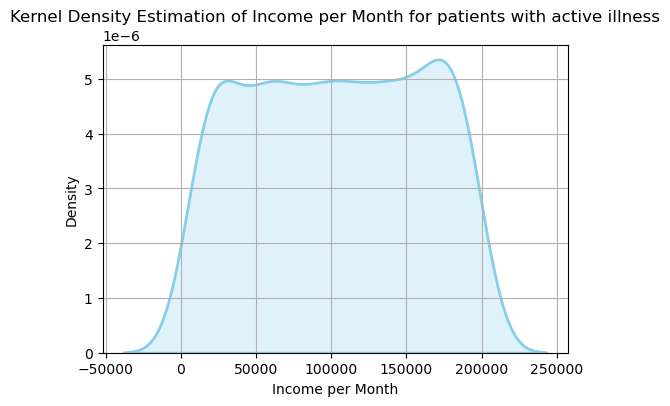

In [19]:
# Plotting the kernel density estimation (KDE) plot
plt.figure(figsize=(6, 4))
sns.kdeplot(income_data, color='skyblue', fill=True, linewidth=2)
plt.xlabel('Income per Month')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Income per Month for patients with active illness')
plt.grid(True)
plt.show()

### 5. Find out the no. of days of reduced activity of male and female seperately due to illness

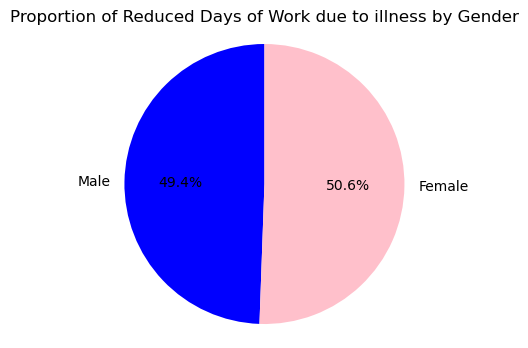

In [7]:
# Separate data for males and females
male_data = df[df['gender'] == 'Male']
female_data = df[df['gender'] == 'Female']

# Calculate the total reduced days for males and females
total_reduced_days_male = male_data['reduced_illness'].sum()
total_reduced_days_female = female_data['reduced_illness'].sum()

# Create a pie chart
labels = ['Male', 'Female']
sizes = [total_reduced_days_male, total_reduced_days_female]
colors = ['blue', 'pink']
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Reduced Days of Work due to illness by Gender')
plt.show()

### 6. Analyze how the income of a patient affects the no. of visits to the hospitals

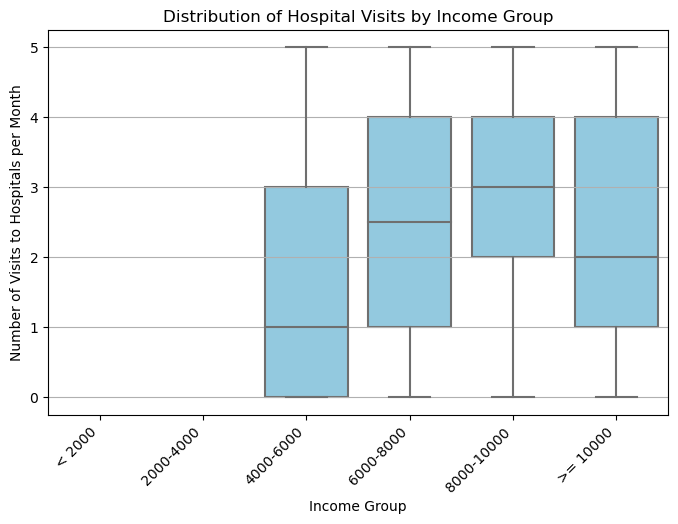

In [21]:
income_ranges = [0, 2000, 4000, 6000, 8000, 10000, float('inf')]
income_labels = ['< 2000', '2000-4000', '4000-6000', '6000-8000', '8000-10000', '>= 10000']

# Segment data into income groups
df['income_group'] = pd.cut(df['income_pm'], bins=income_ranges, labels=income_labels)

# Plotting the box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='income_group', y='visits_pm', data=df, color='skyblue')
plt.xlabel('Income Group')
plt.ylabel('Number of Visits to Hospitals per Month')
plt.title('Distribution of Hospital Visits by Income Group')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

### 7. count the no. of males and females affected by illness

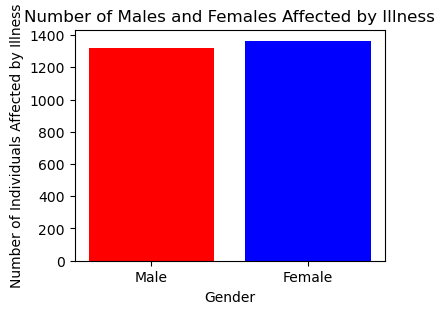

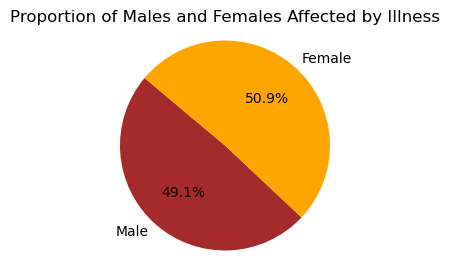

In [10]:
# Count the number of males and females affected by illness
males_affected = df[df['gender'] == 'Male']['active_illness'].sum()
females_affected = df[df['gender'] == 'Female']['active_illness'].sum()

# Plotting the bar chart
plt.figure(figsize=(4, 3))
genders = ['Male', 'Female']
affected_counts = [males_affected, females_affected]
plt.bar(genders, affected_counts, color=['red', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Number of Individuals Affected by Illness')
plt.title('Number of Males and Females Affected by Illness')
plt.show()

# Plotting the pie chart
plt.figure(figsize=(4, 3))
plt.pie(affected_counts, labels=genders, colors=['brown', 'orange'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Males and Females Affected by Illness')
plt.show()

### 8. find patients in which area are most vulnerable to health issues

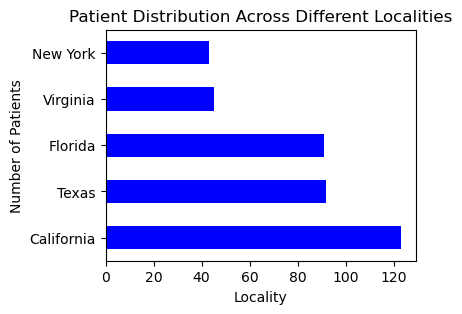

In [91]:
# Count the number of patients in each locality
locality_counts = df['locality'].value_counts()

# Consider only the top 5 localities with the maximum number of patients
top_5_localities = locality_counts.head(5)

# Plotting the bar chart
plt.figure(figsize=(4, 3))
top_5_localities.plot(kind='barh', color='blue')
plt.xlabel('Locality')
plt.ylabel('Number of Patients')
plt.title('Patient Distribution Across Different Localities')
plt.xticks(rotation=0)
plt.show()

### 9. find the age group of people with most active illness

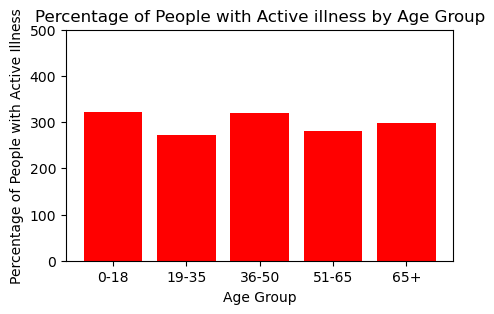

In [12]:
# Define age bins
age_bins = [0, 18, 35, 50, 65, float('inf')]
age_labels = ['0-18', '19-35', '36-50', '51-65', '65+']

# Segment patients into different age groups
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Group by age group and calculate the percentage of people with active illness
age_group_summary = df.groupby('age_group').agg(
    percentage_active_illness=('active_illness', lambda x: (x.sum() / len(x)) * 100)
).reset_index()

# Plotting the analysis results
plt.figure(figsize=(5, 3))
plt.bar(age_group_summary['age_group'], age_group_summary['percentage_active_illness'], color='red')
plt.xlabel('Age Group')
plt.ylabel('Percentage of People with Active Illness')
plt.title('Percentage of People with Active illness by Age Group')
plt.ylim(0, 500)
plt.show()


### 10. show how the distance for hospital affects the patients hospital visit

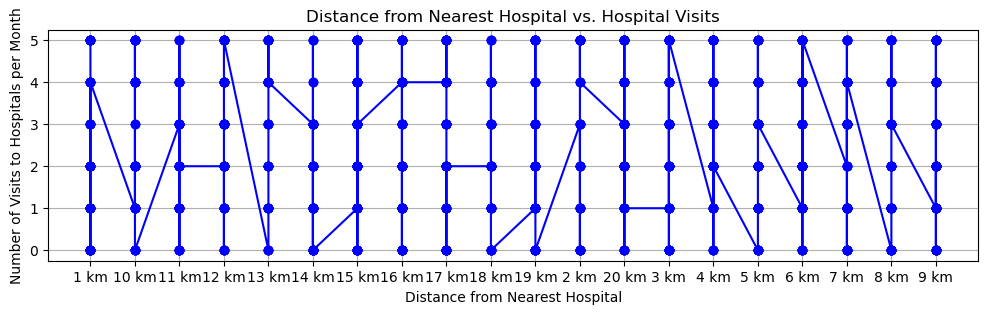

In [93]:

df = df.sort_values(by='nearest_hospital_dist')

# Plotting the line plot
plt.figure(figsize=(12, 3))
plt.plot(df['nearest_hospital_dist'], df['visits_pm'], marker='o', color='blue', linestyle='-')
plt.xlabel('Distance from Nearest Hospital')
plt.ylabel('Number of Visits to Hospitals per Month')
plt.title('Distance from Nearest Hospital vs. Hospital Visits')
plt.grid(True)
plt.show()

### 11. find in which season the active illness cases are more

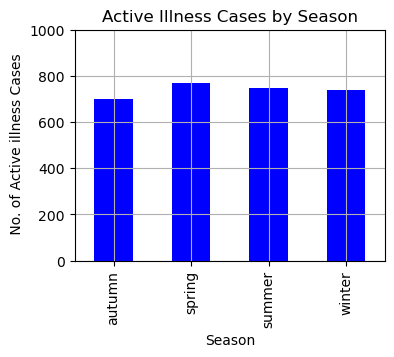

In [94]:

# Group by season and calculate the total active illness cases in each season
season_illness_counts = df.groupby('season')['active_illness'].sum()

# Plotting the bar chart
plt.figure(figsize=(4, 3))
season_illness_counts.plot(kind='bar', color='blue')
plt.xlabel('Season')
plt.ylabel(' No. of Active illness Cases')
plt.title('Active Illness Cases by Season')
plt.xticks(rotation=90)
plt.grid(True)
plt.ylim(0, 1000)
plt.show()

### 12. Investigate the relationship between patients' healthcare expenditure, income of patients and no of doctor visits

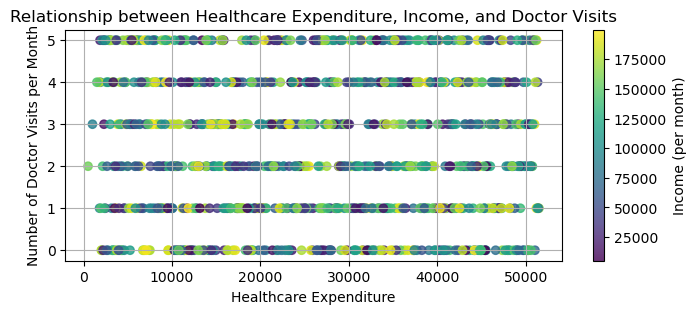

In [95]:

# Plotting the scatter plot
plt.figure(figsize=(8, 3))
plt.scatter(df['hospital_exp'], df['visits_pm'], c=df['income_pm'], cmap='viridis', alpha=0.8)
plt.colorbar(label='Income (per month)')
plt.xlabel('Healthcare Expenditure')
plt.ylabel('Number of Doctor Visits per Month')
plt.title('Relationship between Healthcare Expenditure, Income, and Doctor Visits')
plt.grid(True)
plt.show()